In [1]:
import torch
import einops

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import itertools

from utils.components import *
from utils.config import *
from utils.einmask import EinMask
from utils.dataset import NinoData

from utils.masking import *

from omegaconf import OmegaConf
from dataclasses import replace

In [2]:
cfg_file = OmegaConf.load('mae.yaml')
config = MTMConfig.from_omegaconf(cfg_file['defaults'])

In [3]:
def xr_pcc(pred: xr.DataArray, obs: xr.DataArray, dim: tuple[str]):
        num = (pred * obs).sum(dim)
        denom = np.sqrt((pred**2).sum(dim)) * np.sqrt((obs**2).sum(dim))
        return num / denom

In [4]:
ds = NinoData(config.trainer.godas_path, config.data)

In [5]:
nino34 = ds.dataset['temp_ocn_0a'].sel(lon=slice(160, 210), lat=slice(-5, 5)).mean(dim=['lon', 'lat'])#.rolling(time = 3).mean()
nino34_smooth = ds.dataset['temp_ocn_0a'].sel(lon=slice(160, 210), lat=slice(-5, 5)).mean(dim=['lon', 'lat']).rolling(time = 3).mean()

In [7]:
ls = np.linspace(0,1, 11)
id = np.argwhere(ls > 0.5).max(initial= 0)
print(float(id))

10.0


In [25]:
pcc = xr_pcc(ds.dataset['temp_ocn_0a'], ds.dataset['temp_ocn_0a'].rolling(time=3).mean(), 'time')

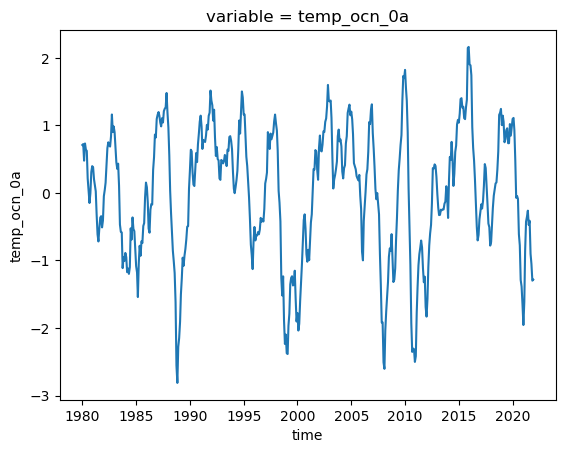

In [19]:
nino34.plot()

In [10]:
ds.dataset

<xarray.Dataset> Size: 155MB
Dimensions:       (time: 504, lat: 64, lon: 120)
Coordinates:
  * time          (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2021-12-01
  * lat           (lat) float64 512B -31.0 -30.0 -29.0 -28.0 ... 30.0 31.0 32.0
  * lon           (lon) float64 960B 90.0 92.0 94.0 96.0 ... 324.0 326.0 328.0
    month         (time) int64 4kB 1 2 3 4 5 6 7 8 9 10 ... 4 5 6 7 8 9 10 11 12
    variable      <U12 48B 'temp_ocn_0a'
Data variables:
    temp_ocn_0a   (time, lat, lon) float64 31MB 0.9376 0.8365 ... 0.08766 0.1493
    temp_ocn_3a   (time, lat, lon) float64 31MB 1.826 1.918 ... -0.01389 0.05493
    temp_ocn_8a   (time, lat, lon) float64 31MB 1.047 1.032 ... 0.1945 0.3425
    temp_ocn_14a  (time, lat, lon) float64 31MB 2.268 2.347 ... -0.1503 0.0379
    tauxa         (time, lat, lon) float64 31MB -0.1726 -0.2267 ... 0.2099

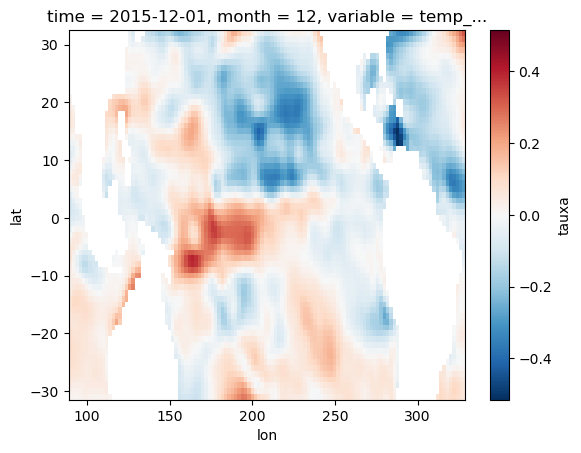

In [13]:
ds.dataset['tauxa'].sel(time='2015-12-01').plot()

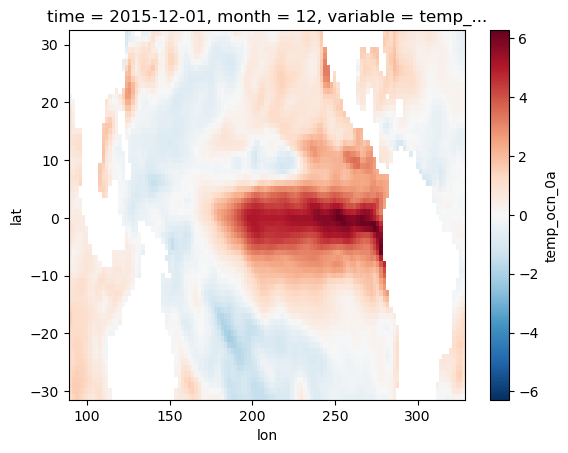

In [14]:
ds.dataset['temp_ocn_0a'].sel(time='2015-12-01').plot()